In [1]:
from google.colab import files


uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20231220.csv to NYPD_Arrest_Data__Year_to_Date__20231220.csv


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle, islice
import io

df = pd.read_csv(io.BytesIO(uploaded['NYPD_Arrest_Data__Year_to_Date__20231220.csv']))
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [3]:
df.count()

ARREST_KEY                  170095
ARREST_DATE                 170095
PD_CD                       170095
PD_DESC                     170095
KY_CD                       170082
OFNS_DESC                   170095
LAW_CODE                    170095
LAW_CAT_CD                  168838
ARREST_BORO                 170095
ARREST_PRECINCT             170095
JURISDICTION_CODE           170095
AGE_GROUP                   170095
PERP_SEX                    170095
PERP_RACE                   170095
X_COORD_CD                  170095
Y_COORD_CD                  170095
Latitude                    170095
Longitude                   170095
New Georeferenced Column    170095
dtype: int64

In [4]:
#checking for missing values
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [5]:
#Removing not needed columns
df.drop(['PD_CD','KY_CD','LAW_CODE','LAW_CAT_CD','ARREST_PRECINCT','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'],inplace=True, axis=1)

In [6]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,261209118,01/01/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,K,0,45-64,F,BLACK
1,262984267,02/03/2023,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,K,0,25-44,M,BLACK
2,263664549,02/15/2023,STRANGULATION 1ST,FELONY ASSAULT,K,0,25-44,M,WHITE
3,261345231,01/04/2023,STRANGULATION 1ST,FELONY ASSAULT,M,0,25-44,M,BLACK
4,263536618,02/13/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,K,0,25-44,M,BLACK


In [7]:
df.dtypes

ARREST_KEY            int64
ARREST_DATE          object
PD_DESC              object
OFNS_DESC            object
ARREST_BORO          object
JURISDICTION_CODE     int64
AGE_GROUP            object
PERP_SEX             object
PERP_RACE            object
dtype: object

In [8]:
df['ARREST_DATE']=pd.to_datetime(df['ARREST_DATE'],errors='coerce')

In [9]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE          datetime64[ns]
PD_DESC                      object
OFNS_DESC                    object
ARREST_BORO                  object
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
dtype: object

In [10]:
#Arrest number based on boroughs
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='ARREST_BORO'>

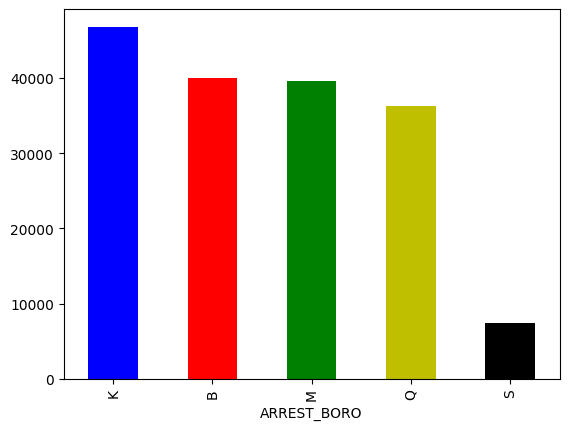

In [26]:
my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(df)))
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',color=my_colors)

In [11]:
#Arrest numbers according to race
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             82041
WHITE HISPANIC                    43081
BLACK HISPANIC                    16501
WHITE                             16373
ASIAN / PACIFIC ISLANDER           9066
UNKNOWN                            2481
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='PERP_RACE'>

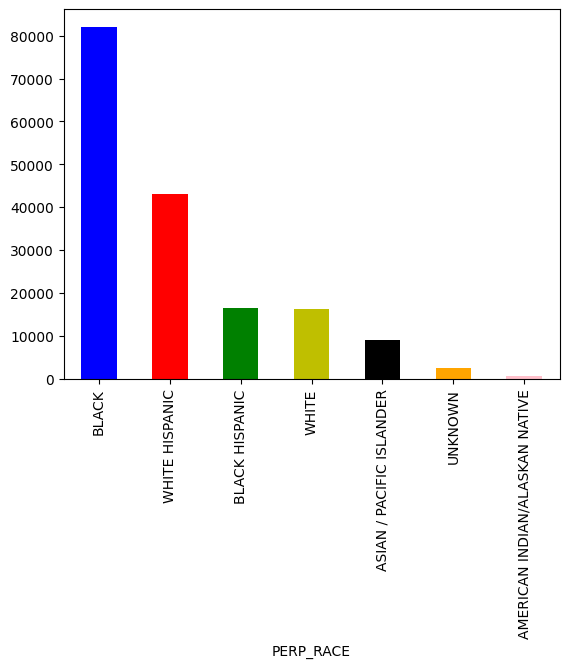

In [30]:
my_colors = list(islice(cycle(['b','r','g','y','k','orange','pink']), None, len(df)))
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',color=my_colors)

In [12]:
#Arrest numbers according to gender
df.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_SEX
M    137574
F     29018
U      3503
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='PERP_SEX'>

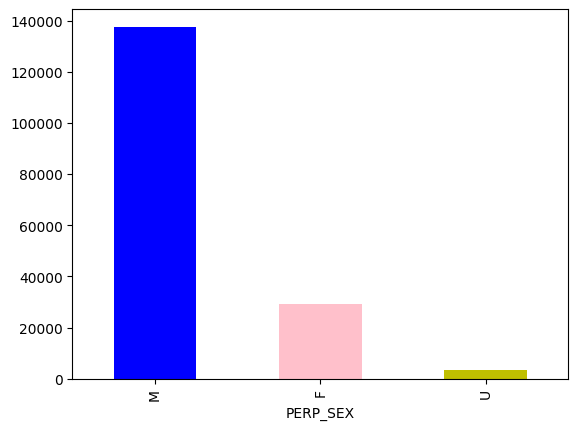

In [31]:
my_colors = list(islice(cycle(['b','pink','y']), None, len(df)))
df.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',color=my_colors)

In [13]:
df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()

AGE_GROUP
18-24    30036
25-44    97601
45-64    33416
65+       2797
<18       6245
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='AGE_GROUP'>

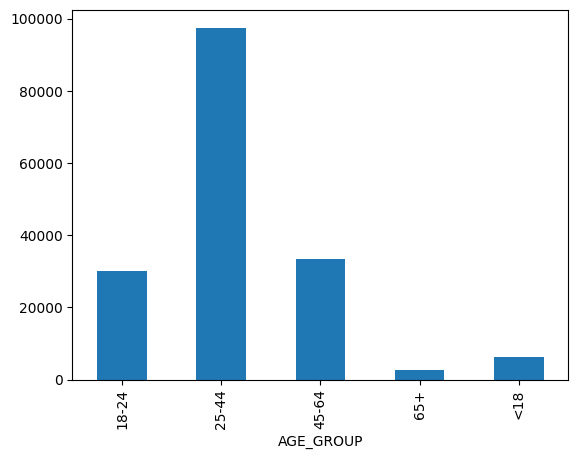

In [22]:
#Arrest numbers according to age
df.groupby(['AGE_GROUP'])['ARREST_KEY'].count().plot(kind='bar')

In [14]:
#10 most arrest charges
df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False).head(10)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='OFNS_DESC'>

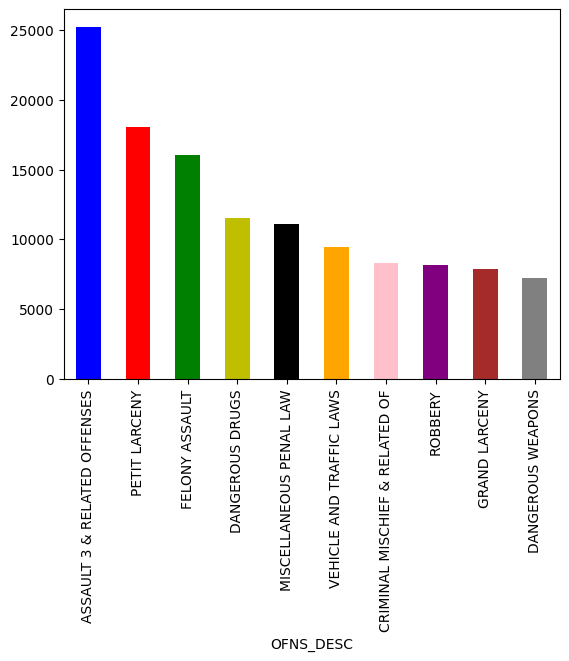

In [36]:
my_colors = list(islice(cycle(['b','r','g','y','k','orange','pink','purple','brown','gray']), None, len(df)))
df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=my_colors)

In [15]:
#Arrest throught out the year
df.groupby(df['ARREST_DATE'].dt.strftime('%B'))['ARREST_KEY'].count()


ARREST_DATE
April        18303
August       19893
February     16744
January      18816
July         19158
June         19490
March        19033
May          20198
September    18460
Name: ARREST_KEY, dtype: int64

In [16]:
data = {'ARREST_DATE':["January", "February", "March", "April", "May",'June','July','August','September'], 'ARREST_NUM': [18816, 16744, 19033,20198,18303,19490,19158,19893,18460]}
df1 = pd.DataFrame(data)
print(df1)

  ARREST_DATE  ARREST_NUM
0     January       18816
1    February       16744
2       March       19033
3       April       20198
4         May       18303
5        June       19490
6        July       19158
7      August       19893
8   September       18460


<Axes: xlabel='ARREST_DATE', ylabel='ARREST_NUM'>

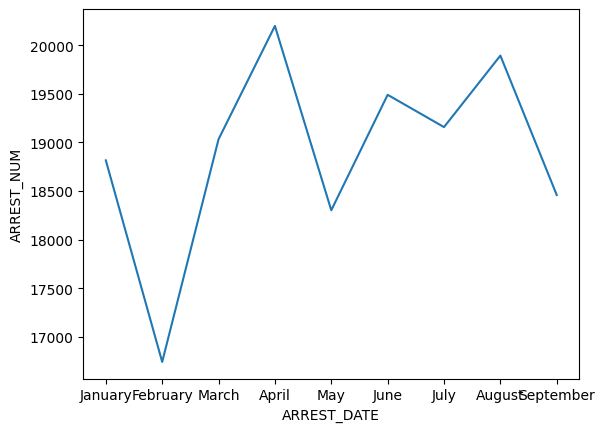

In [17]:
sns.lineplot(x='ARREST_DATE', y='ARREST_NUM',data=df1)

conclusion
Based on this dataset and the analysis we conclused that The Bronks had the highest number of arrest
Black has the highest number of arrest based on race
Male arrest are higher than Female
25 to 44 is the age witht he hishest arrest number
April is the month with the highest arrest while Feb is the lowest